## Predicting legendary Pokemons

We use a Pokemon dataset found on kaggle to predict if a Pokemon is a legendary using its stats and its type. We use 4  classifiction algorithms and choose the best one.

In [386]:
# Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [387]:
# Import the data

pokemon = pd.read_csv('Pokemon.csv')

In [389]:
# View the top of the data

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [390]:
# View the bottom of the data

pokemon.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [391]:
# Get information about the different features

pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [392]:
# Get information about the values of the features

pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [144]:
pokemon[pokemon['HP']<20]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


In [145]:
pokemon[pokemon['HP']>200]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [21]:
# create new feature for if a pokemon is mega
import re

def isMega(s):
    words = re.findall('[A-Z][a-z]*', s)
    return ('Mega' in words)

In [240]:
pokemon['Mega'] = pokemon['Name'].apply(isMega)

In [147]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False


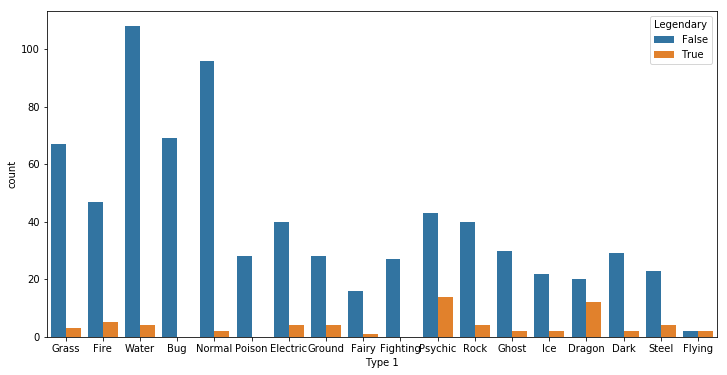

In [148]:
plt.figure(figsize=(12,6))
sns.countplot(pokemon['Type 1'], hue=pokemon['Legendary'])

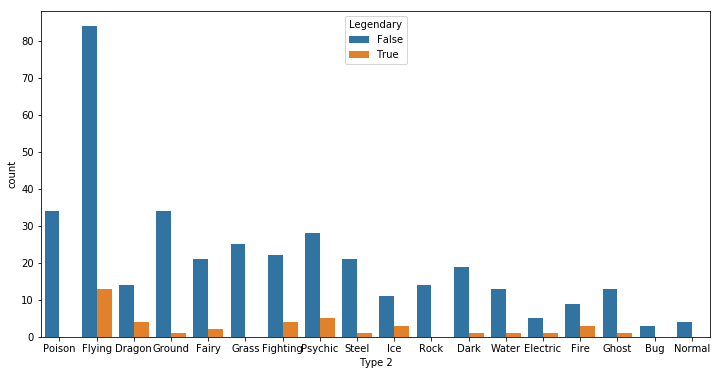

In [149]:
plt.figure(figsize=(12,6))
sns.countplot(pokemon['Type 2'], hue=pokemon['Legendary'])

In [241]:
pokemon['Dual Type'] = ~pokemon['Type 2'].isnull()

In [151]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Dual Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,False,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,False,False


In [152]:
# There doesn't seem to be that much direct correlation between dual types and legendary

pokemon.groupby(['Dual Type', 'Legendary'])['Name'].nunique()

Dual Type  Legendary
False      False        361
           True          25
True       False        374
           True          40
Name: Name, dtype: int64

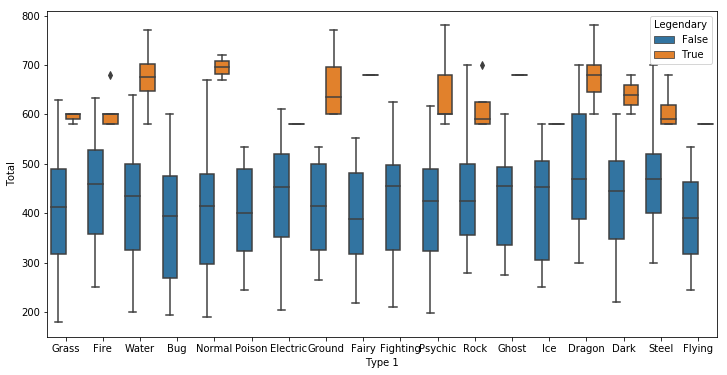

In [291]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Type 1', y='Total', data=pokemon, hue='Legendary')

# Predict only using stats

In [381]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [153]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Mega',
       'Dual Type'],
      dtype='object')

In [282]:
X = pokemon[['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon['Legendary']

In [382]:
def learn(X, y, state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=state)
    models = [('kNN', KNeighborsClassifier()), ('log_reg', LogisticRegression()), ('bayes', GaussianNB()), ('forest', RandomForestClassifier())]
    
    for name, classifier in models:
        model = classifier
        pred = model.fit(X_train, y_train).predict(X_test)
        f1 = f1_score(y_test, pred, average='macro')
        acc = accuracy_score(y_test, pred)
        print(name)
        print('f1-score:', f1)
        print('accuracy:', acc)
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred), '\n')

In [383]:
learn(X,y,50)

kNN
f1-score: 0.8317009562445667
accuracy: 0.9583333333333334
[[241   6]
 [  5  12]]
             precision    recall  f1-score   support

      False       0.98      0.98      0.98       247
       True       0.67      0.71      0.69        17

avg / total       0.96      0.96      0.96       264
 

log_reg
f1-score: 0.5905283838279392
accuracy: 0.9431818181818182
[[247   0]
 [ 15   2]]
             precision    recall  f1-score   support

      False       0.94      1.00      0.97       247
       True       1.00      0.12      0.21        17

avg / total       0.95      0.94      0.92       264
 

bayes
f1-score: 0.7937177684013127
accuracy: 0.9242424242424242
[[227  20]
 [  0  17]]
             precision    recall  f1-score   support

      False       1.00      0.92      0.96       247
       True       0.46      1.00      0.63        17

avg / total       0.97      0.92      0.94       264
 

forest
f1-score: 0.8281163920468773
accuracy: 0.9507575757575758
[[237  10]
 [  3  14]]


In [221]:
model = KNeighborsClassifier()
pred = model.fit(X_train, y_train).predict(X_test)

In [223]:
pokemon.iloc[list(X_test[y_test != pred].index)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Dual Type
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,False,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False,False,False
546,488,Cresselia,Psychic,NaN,600,120,70,120,75,130,85,4,False,False,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False,True,True
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True,False,True
423,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True,False,False
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True,False,False
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False,False,False
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,False,True
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False,False,True


# Predict using types

In [242]:
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [243]:
pokemon.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Dual Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True,True
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,False,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,False,True
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,True,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,True,True
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False,False,False


In [259]:
pokemon_types = pd.get_dummies(data=pokemon, columns=['Type 1', 'Type 2'])

In [260]:
pokemon_types.columns

Index(['#', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'Mega', 'Dual Type', 'Type 1_Bug',
       'Type 1_Dark', 'Type 1_Dragon', 'Type 1_Electric', 'Type 1_Fairy',
       'Type 1_Fighting', 'Type 1_Fire', 'Type 1_Flying', 'Type 1_Ghost',
       'Type 1_Grass', 'Type 1_Ground', 'Type 1_Ice', 'Type 1_Normal',
       'Type 1_Poison', 'Type 1_Psychic', 'Type 1_Rock', 'Type 1_Steel',
       'Type 1_Water', 'Type 2_Bug', 'Type 2_Dark', 'Type 2_Dragon',
       'Type 2_Electric', 'Type 2_Fairy', 'Type 2_Fighting', 'Type 2_Fire',
       'Type 2_Flying', 'Type 2_Ghost', 'Type 2_Grass', 'Type 2_Ground',
       'Type 2_Ice', 'Type 2_None', 'Type 2_Normal', 'Type 2_Poison',
       'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [280]:
X_types = pokemon_types.drop(['#','Name','Mega','Dual Type','Legendary'],axis=1)
y_types = pokemon_types['Legendary']

In [384]:
learn(X_types, y_types, 50)

kNN
f1-score: 0.8317009562445667
accuracy: 0.9583333333333334
[[241   6]
 [  5  12]]
             precision    recall  f1-score   support

      False       0.98      0.98      0.98       247
       True       0.67      0.71      0.69        17

avg / total       0.96      0.96      0.96       264
 

log_reg
f1-score: 0.6763714373276126
accuracy: 0.9393939393939394
[[243   4]
 [ 12   5]]
             precision    recall  f1-score   support

      False       0.95      0.98      0.97       247
       True       0.56      0.29      0.38        17

avg / total       0.93      0.94      0.93       264
 

bayes
f1-score: 0.4137741046831956
accuracy: 0.4962121212121212
[[115 132]
 [  1  16]]
             precision    recall  f1-score   support

      False       0.99      0.47      0.63       247
       True       0.11      0.94      0.19        17

avg / total       0.93      0.50      0.61       264
 

forest
f1-score: 0.7993227834980305
accuracy: 0.9583333333333334
[[244   3]
 [  8   9]]


# Predict without megas

In [320]:
pokemon_nomegas = pokemon_types[pokemon_types['Mega']==False].reset_index(drop=True)

In [321]:
pokemon_nomegas.head(10)

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,1,0,0,0,0,0,0
4,5,Charmeleon,405,58,64,58,80,65,80,1,...,0,0,0,1,0,0,0,0,0,0
5,6,Charizard,534,78,84,78,109,85,100,1,...,0,0,0,0,0,0,0,0,0,0
6,7,Squirtle,314,44,48,65,50,64,43,1,...,0,0,0,1,0,0,0,0,0,0
7,8,Wartortle,405,59,63,80,65,80,58,1,...,0,0,0,1,0,0,0,0,0,0
8,9,Blastoise,530,79,83,100,85,105,78,1,...,0,0,0,1,0,0,0,0,0,0
9,10,Caterpie,195,45,30,35,20,20,45,1,...,0,0,0,1,0,0,0,0,0,0


In [322]:
X_nomegas = pokemon_nomegas.drop(['#','Name','Mega','Dual Type','Legendary'],axis=1)
y_nomegas = pokemon_nomegas['Legendary']

In [385]:
learn(X_nomegas, y_nomegas, 5)

kNN
f1-score: 0.8707836014530359
accuracy: 0.9558232931726908
[[220  11]
 [  0  18]]
             precision    recall  f1-score   support

      False       1.00      0.95      0.98       231
       True       0.62      1.00      0.77        18

avg / total       0.97      0.96      0.96       249
 

log_reg
f1-score: 0.7729483282674772
accuracy: 0.9518072289156626
[[229   2]
 [ 10   8]]
             precision    recall  f1-score   support

      False       0.96      0.99      0.97       231
       True       0.80      0.44      0.57        18

avg / total       0.95      0.95      0.95       249
 

bayes
f1-score: 0.39880568405919975
accuracy: 0.4738955823293173
[[103 128]
 [  3  15]]
             precision    recall  f1-score   support

      False       0.97      0.45      0.61       231
       True       0.10      0.83      0.19        18

avg / total       0.91      0.47      0.58       249
 

forest
f1-score: 0.810224541244064
accuracy: 0.9477911646586346
[[224   7]
 [  6  12]]


In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_nomegas, y_nomegas, test_size=0.33, random_state=51)

In [354]:
model = KNeighborsClassifier(n_neighbors=5)
pred = model.fit(X_train, y_train).predict(X_test)

In [356]:
pokemon_nomegas.iloc[list(X_test[y_test != pred].index)][['Name','Legendary']]

,Name,Legendary
661,LandorusIncarnate Forme,True
503,Darkrai,True
242,Raikou,True
250,Celebi,False
380,Latios,True
653,Terrakion,True
243,Entei,True
144,Zapdos,True
502,Manaphy,False
581,Archeops,False
